> Note: Data Structure and Algorithms Visualization Tool is available in the following link, feel free to use it: https://csvistool.com/

# LinkedLists


### Definition:

- **LinkedLists** is one of the data structure
- Rather than storing data in an Array or Arrayist which requires contiguous memory, these **linked data structures** store data anywhere in memory, and connects the data by keeping references/pointers/relationships between the locations.
- **LinkedLists** implements List ADT (abstract data type - see last lecture Module 1), same as ArrayLists
- **LinkedLists** do not require resizing operations and can expand indefinitely.

### Types:
- Singly-Linked Lists
- Doubly-Linked Lists
- Circularly-Linked Lists
- ...

### Summary of Time Complexity:
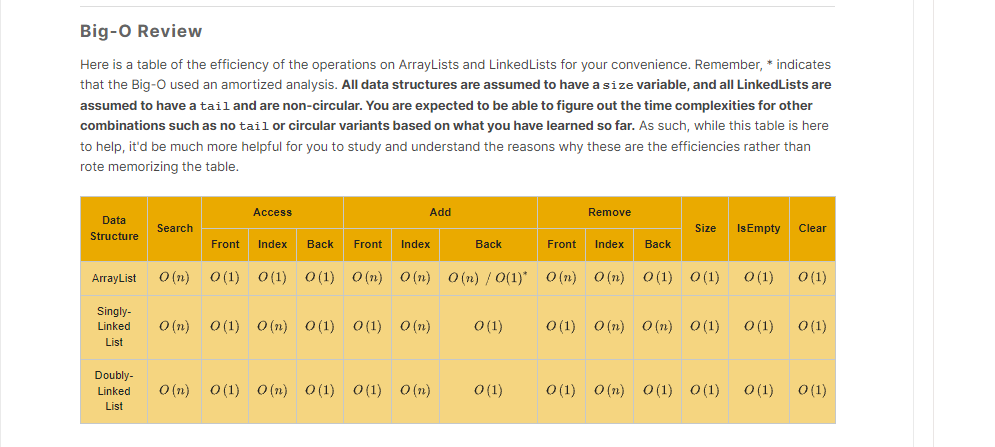

> Please note: O(1) of SLL in Add to Back is under condition of it has tail pointer. (Reason: see section 1.2 -> D. -> Time complexity notes)

## 1. Singly-Linked Lists (SLL)

### 1.1. Definition:
- Nodes in a **singly-linked list** only have a **single pointer** to the node that comes after it in the list.

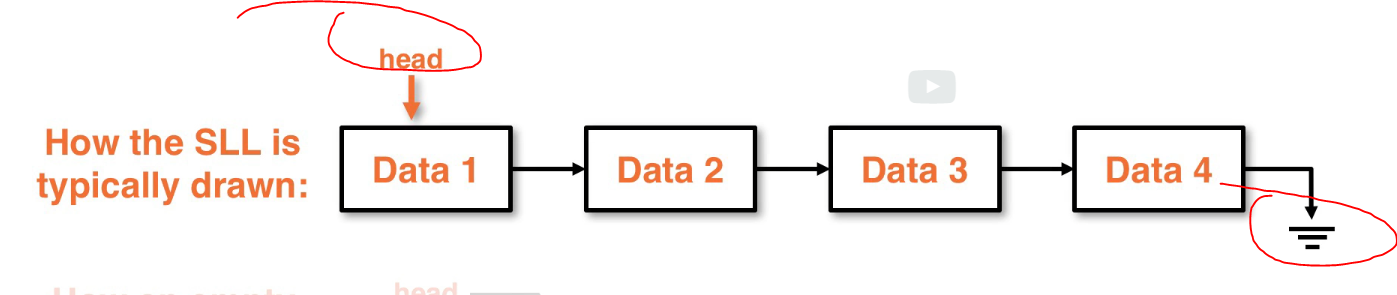

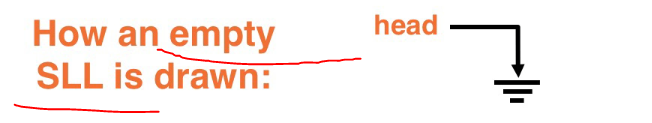

### 1.2. SLL Code Implementation with "int" data type:

#### A. Node Class under "SinglyLinkedList" class

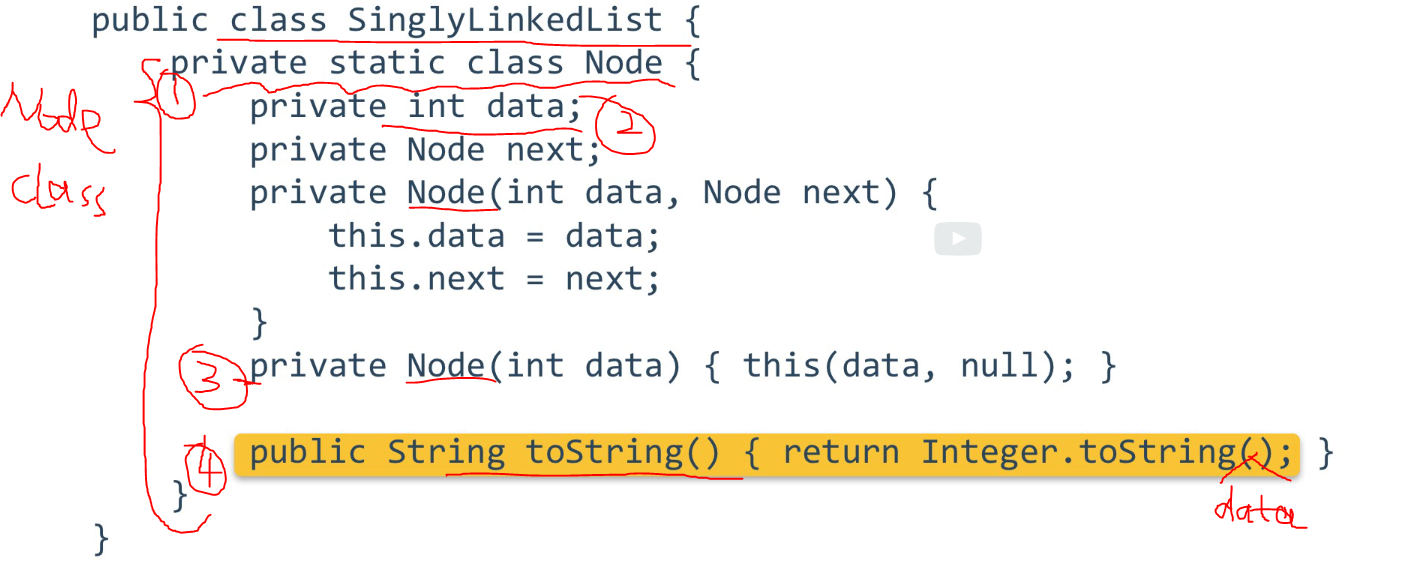

- Pt1: The private inner class - **"Node" class** here is specific to this example, not LinkedLists as a whole. In other implementations, the Node class may not be an inner class and just a separate auxiliary one.
- Pt2: For this example, we use "int" as the **"data" type for the node data**. ("Private int data;") But it can be replaced with any kind of object type.
- Pt3: The **second constructor** under "Node" class is to demonstrate constructor chaining (see This course -> Module 0 Java Review -> Section 1.2.1.); This constructor is for the input where it is SLL with only one node (SLL with one node does not have "next" node, or its "next" parameter is Null)
- Pt4: The last **toString() method** is defined to convert the content of node data (here it is int type) to string, in order to print linkedlists in some main method. The line of code here should be "return Integer.toString(data);"
    - But please note: Since Node data type here is int, when using + operator to combine it with a string, it will be automatically converted by Java from number to string (see next section "B. toString() method xxx"), so this method is not specifically useful here. But this method will need to be defined when node data type is not number http://www.mathcs.emory.edu/~cheung/Courses/170/Syllabus/10/toString.html
    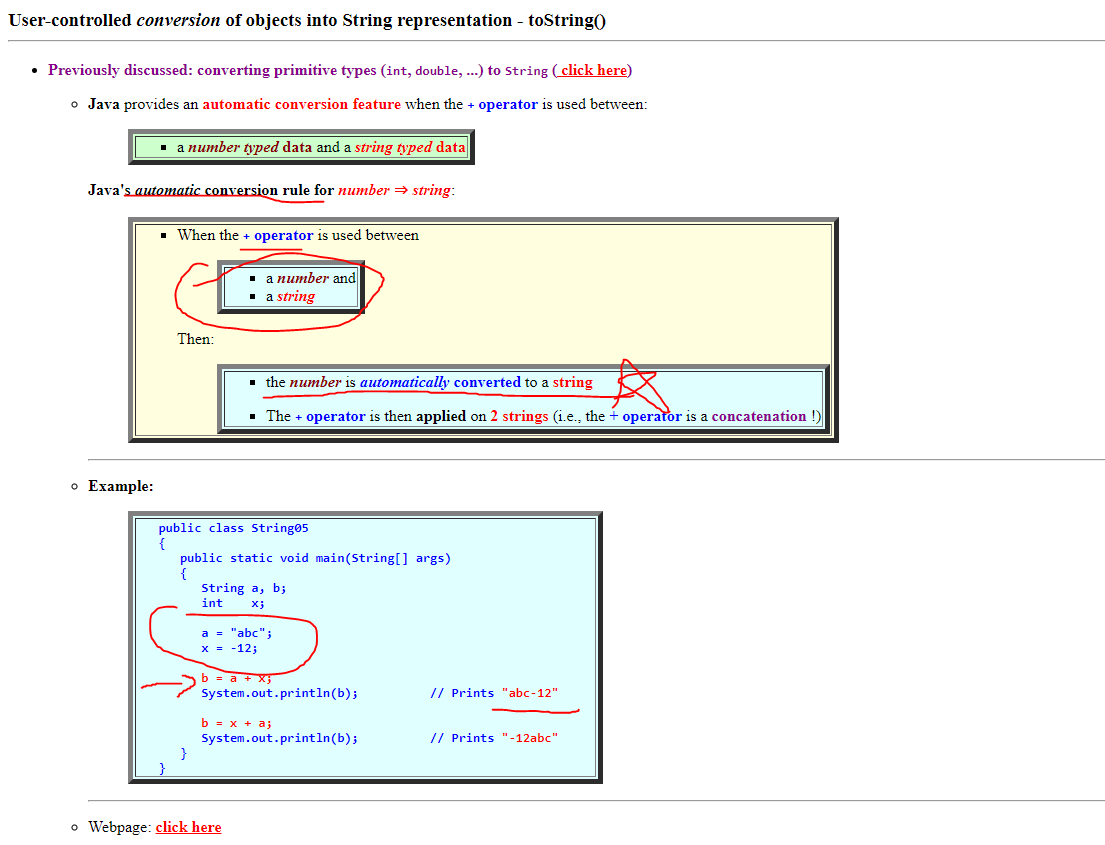

#### B. toString() method under "SinglyLinkedList" class

- This is to concat each node's data together by traversing the nodes in "SLL" class, which is different from the toString() method defined above within "Node" class.
- As mentioned above, Since Node data type here is int, when using + operator to combine it with a string, it will be automatically converted by Java from number to string, so in this method, we don't need to invoke toString() method within "Node" class defined above.

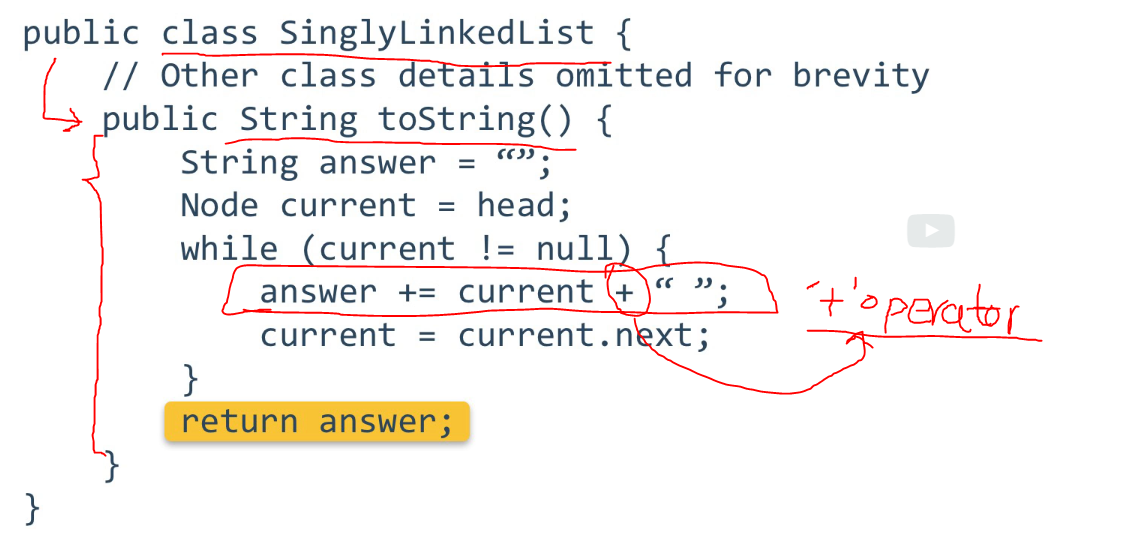

#### C. AddToFront() method under "SinglyLinkedList" class

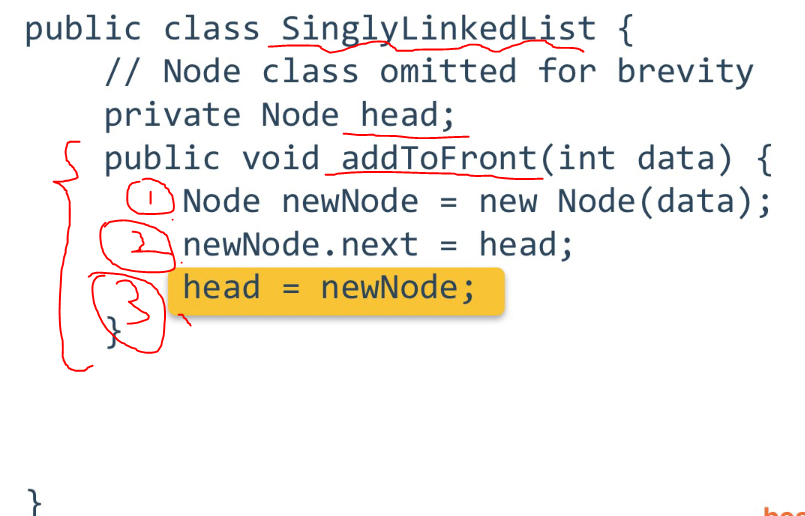

- Pt1: Create new node using the new data
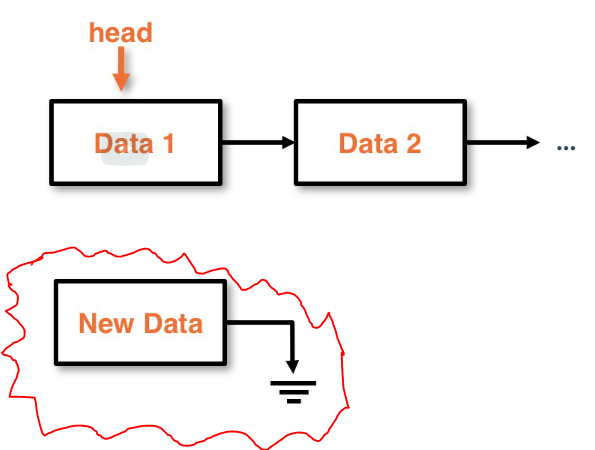
- Pt2: Point newNode's next pointer to current LinkedList's head
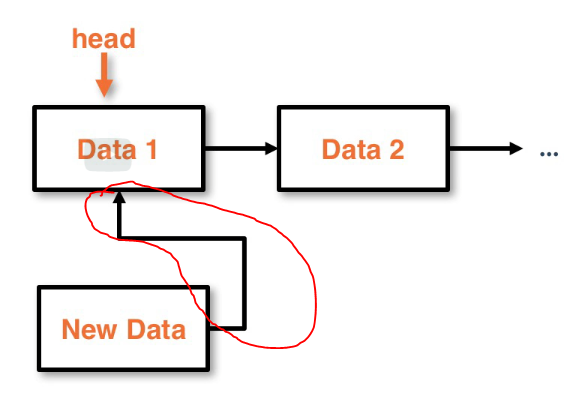
- Pt3: re-set the head of the new LinkedList to point to the newNode
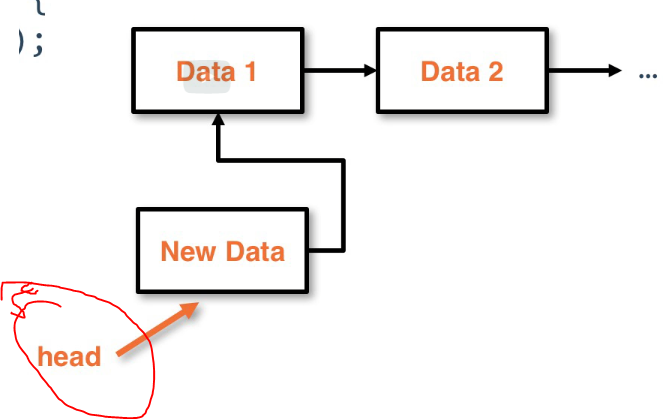

#### D. AddtoBack() method under "SinglyLinkedList" class  

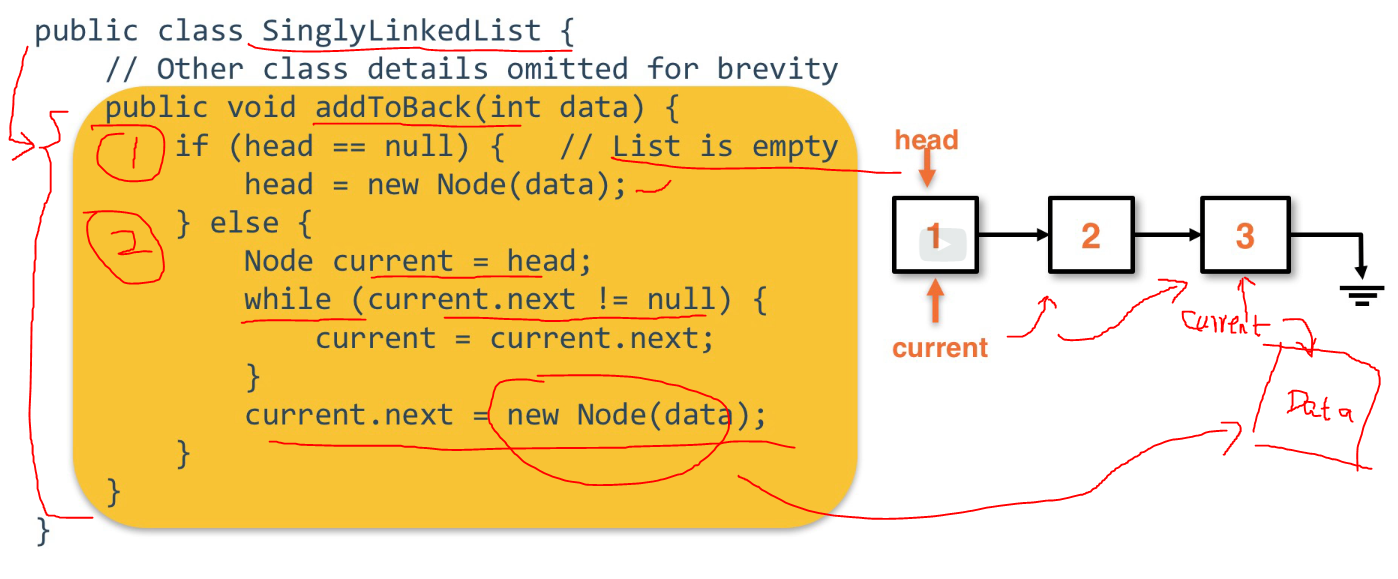

- Pt1: Note the edge case where current linkedlist is empty (Null). In this case, current.next will be Null.next which will throw an exception (NullPointerException). So we need a separate if statement to handle this edge case.
- Pt2: Assign a "current" pointer, Loop through the nodes until the last one. Then point its next to new node to add.

> Time Complexity:
> - If there is only head pointer, we need to traverse the list, so it is O(n)
> - But if there is also a tail pointer, then we don't need to traverse, simply point the tail.next to the new node. Then it is O(1)

#### E. RemoveFromFront() method under "SinglyLinkedList" class

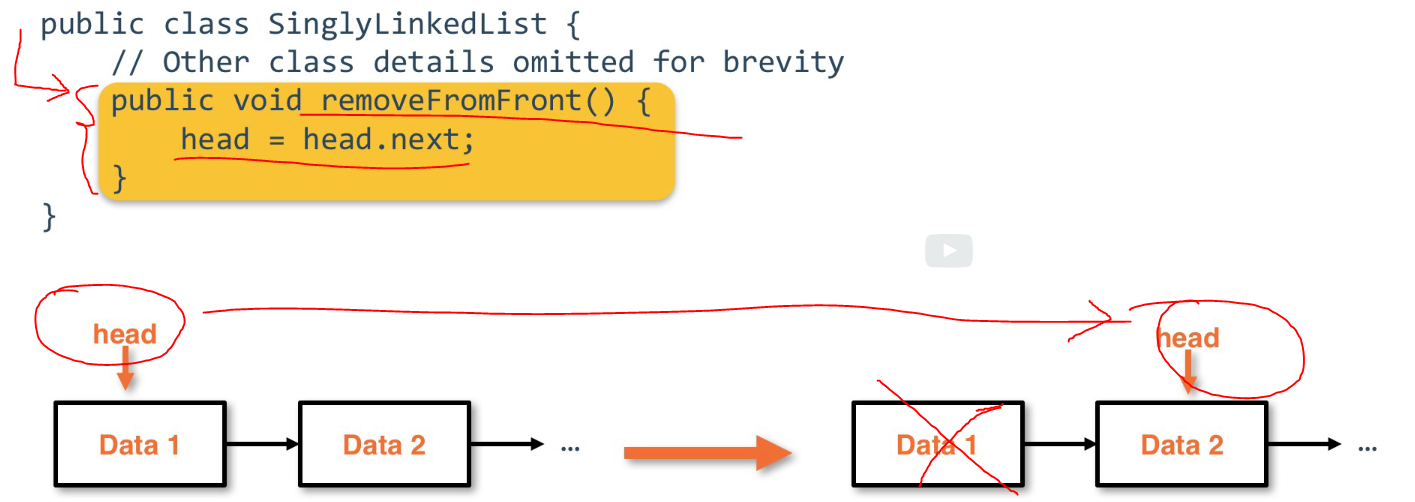

- Simply point the head to the 2nd node.
- Java has garbage collection function which will delete any memory that is no longer accessible.
    - Since Data1 above only points to Data2, there is no way to access Data1 after head is moved to Data2 (Single Linked List is one direction pointer only), therefore Data1 is no longer accessible. Therefore Data1 will be removed by Java automatically.

#### F. RemoveFromBack() method under "SinglyLinkedList" class

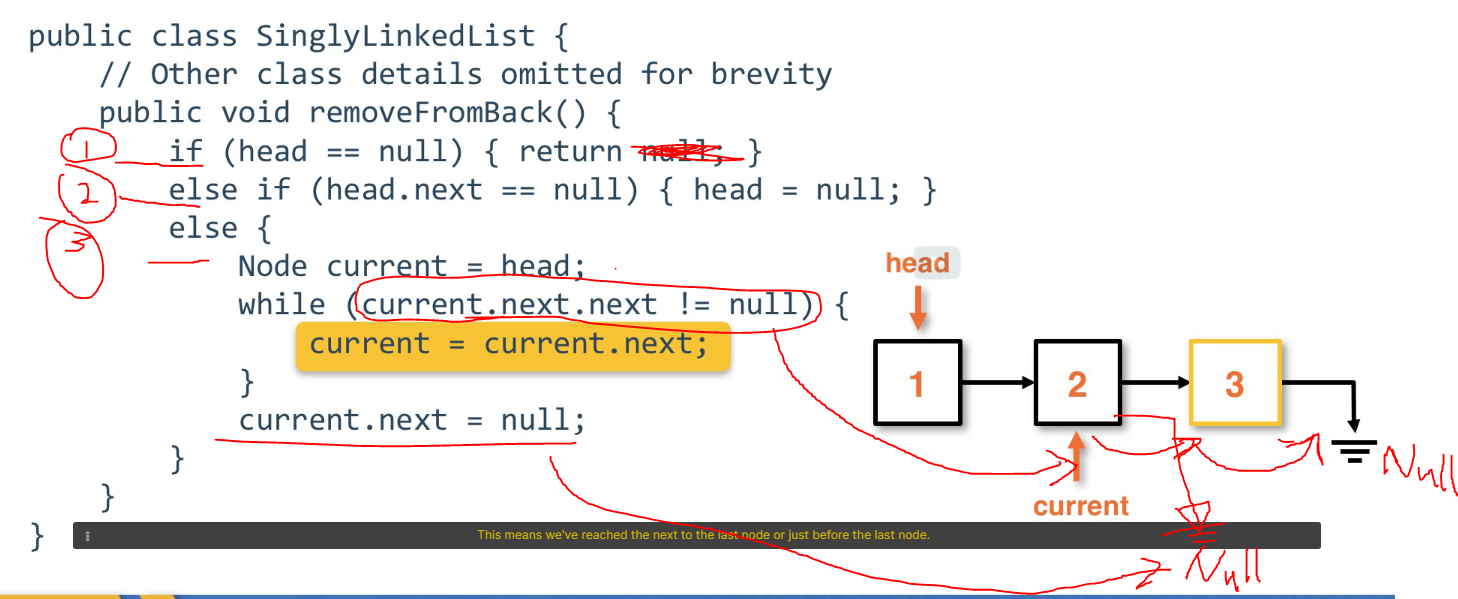

- Pt1: Edge case 1, code should be modified: if statement block should contain "return;" not "return null;" since the return type is void.
- Pt2: Edge case 2, head.next = Null, which means only one node is in the LinkedList. Simply remove this node by pointing head to Null.
- Pt3: Loop current pointer until second last node, then re-point the next pointer from current node to Null, to remove the last node.

- The removed node will be Garbage Collected by Java since it is not accessible

> Time Complexity:
> - No matter if there is tail pointer or not, we still need to traverse the list to get the second last node (tail pointer cannot access second last node since it is SLL), so it is O(n) [Note: For Doubly Linked List, with tail pointer, it is O(1)]

### 1.3. SLL Code Implementation with Generic Types of Node Data

#### A. Node Class under "SinglyLinkedList" class

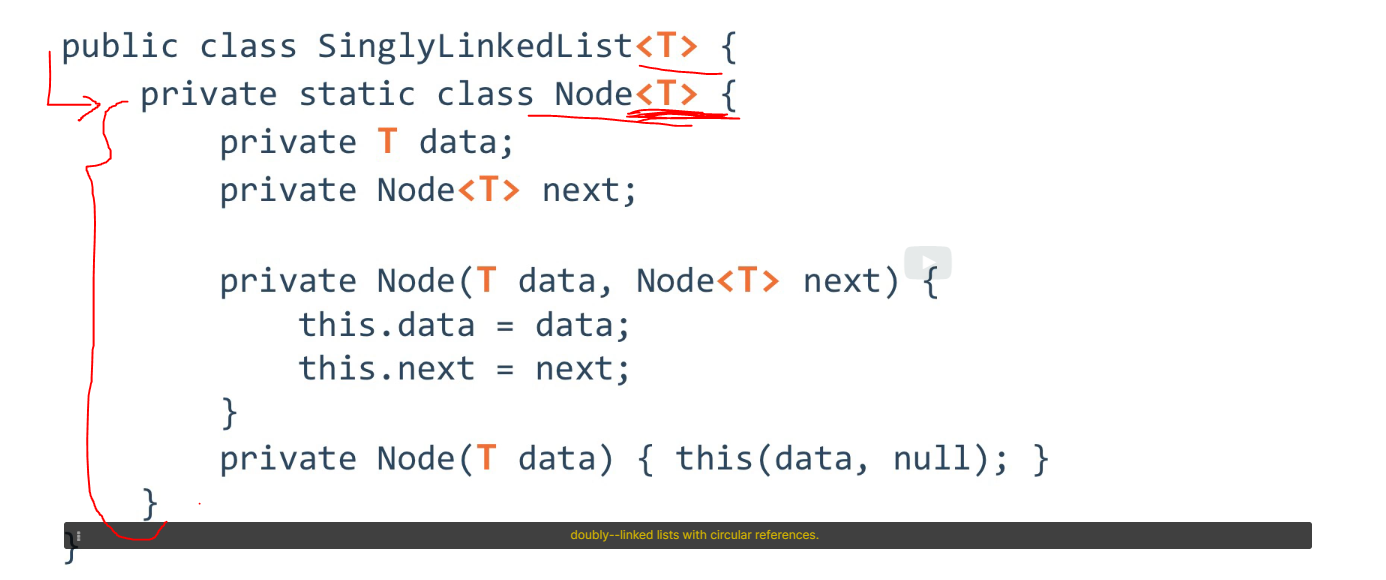

#### B. Other methods under "SinglyLinkedList" class

- Similar to section 1.2 int type, but when you create a new node in any method, you need to use \<T> now:
    - Node\<T> node = new Node\<>(data)

## 2. Algorithms (Iterable and Recursion) related to SLL data structure

### 2.1. Iterable in SLL (SinglyLinkedList)

> Iterable/Iterator interface review -- see this course -> Module 0 Java Review -> Section 1.6. Iterable and Iterator

- In this module, course only talked about using the iterable interface, it did not cover using iterator interface, but I believe it is similar.
- The reason to use Iterable instead of using "while loop" to traverse the nodes in SLL (like Section 1 above) is because: Using Iterable interface can provide the user with a way to iterate and perform operations on the data structure **without giving them internal access to it.** (I am 80% understanding this explanation)
    - For example, you wouldn't want your user to have access to the "head" node of the LinkedList since they could mess with the configuration in a way your implementation didn't expect.
    - Using while loop like Section 1 above, user end code can see "head" node in some way;
    - But using Iterable method below, you will see "head" node is wrapped in a separate class due to Iterator() method requirement. That way, user end won't see "head" node in the code when Traversing the Nodes in SLL

**To use Iterable interface, there are two steps of backend code (i.e. under LinkedList class)**
- Step 1: Implement Iterable and complete its abstract method "iterator()"
    - Since iterator() method needs to return an object type called "Iterator", therefore you see "Iterator\<T>" as object type in method header, and you see "return xxx" in its method body;
    - The returned object is of "Iterator\<T>" object type;
    - Since "Iterator\<T>" object needs two abstract methods being completed (.hasNext() and .next() method) based on iterator() method's requirement, therefore, we need to define these methods within the returned object class, we give it a name called "LLIterator" class -- Step 2 below. And the "return xxx" statement creates a new instance of the class.
    
- Step 2. Define/complete abstract methods .hasNext() and .next() in object class returned from Iterator() method
    - The class name we named is "LLIterator", and it implements Iterator() interface [Note: Iterator abstract method inside of the Iterable interace is actually linked to Iterator Interface.]
    - The **object type** of the instance returned from Step 1 can be either "LLIterator\<T>" or "Iterator\<T>" due to JAVA **polymorphism**.
    - Constructor LLIterator() points curr (current node) to head;
    - .hasNext() method checks if current node is Null;
    - .next() method returns current node's data content and point the pointer to next node.
    - NOTE: It's different from my intuitive thinking, I thought the .hasNext() method checks the next node is/is not Null, and next() method returns next node's data content, but it is actually not.
        - It can be proved in next section "Traversing the Nodes in SLL from user end" -> explicit method's code. Because if next() is printing data of next node, if using that method's code, the first node's won't be printed.
        - Same thing also happens in the Module 0 Java Review -> Section: 1.6.2. -> Iterable Interface -> explicit method's code.
    

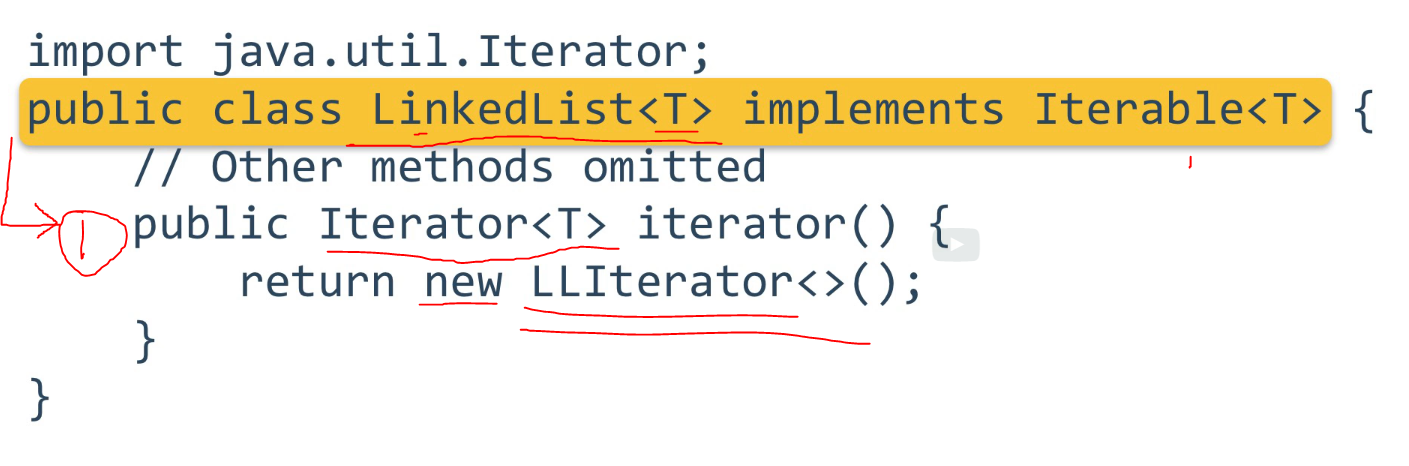

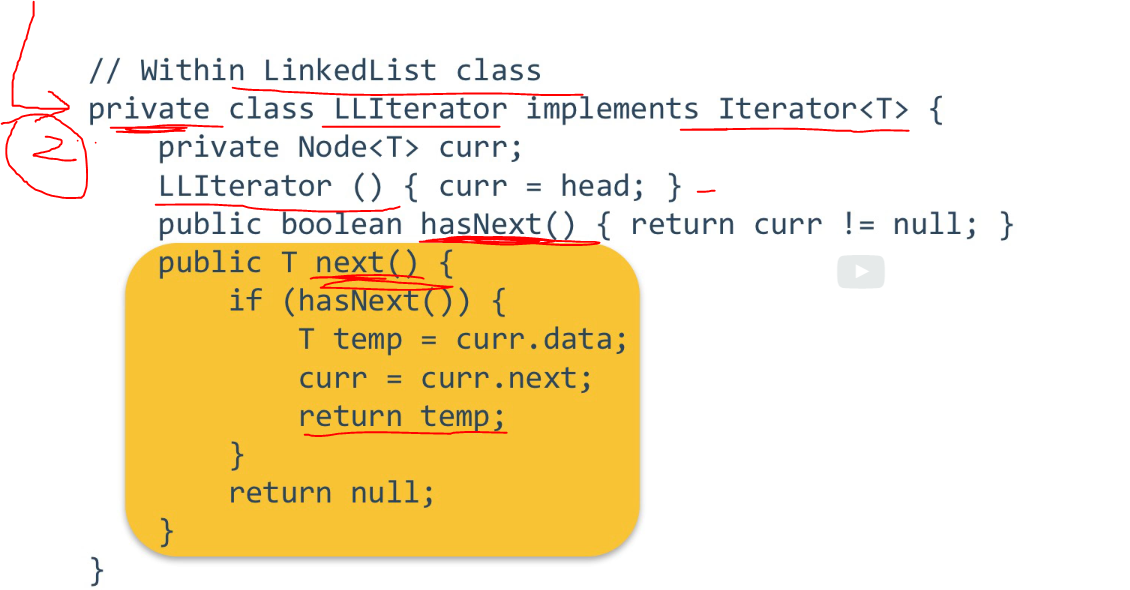

**Traversing the Nodes in SLL from user end (i.e. Outside of LinkedList class)**

- As discussed in Module 0 Java Review Section: 1.6.2. Iterable Interface, there are TWO different methods you can use the Interable interface from user end.

- Method 1: Explicitly create Iterator object then use its .hasNext() and .next() method.
    - Note: you will see the object type of courses.iterator() is "Iterator\<T>" type because it is the return type of iterator() method defined above. But it is also "LLIterator\<T>" type because it is an instance of LLIterator class. (JAVA polymorphism as mentioned above)

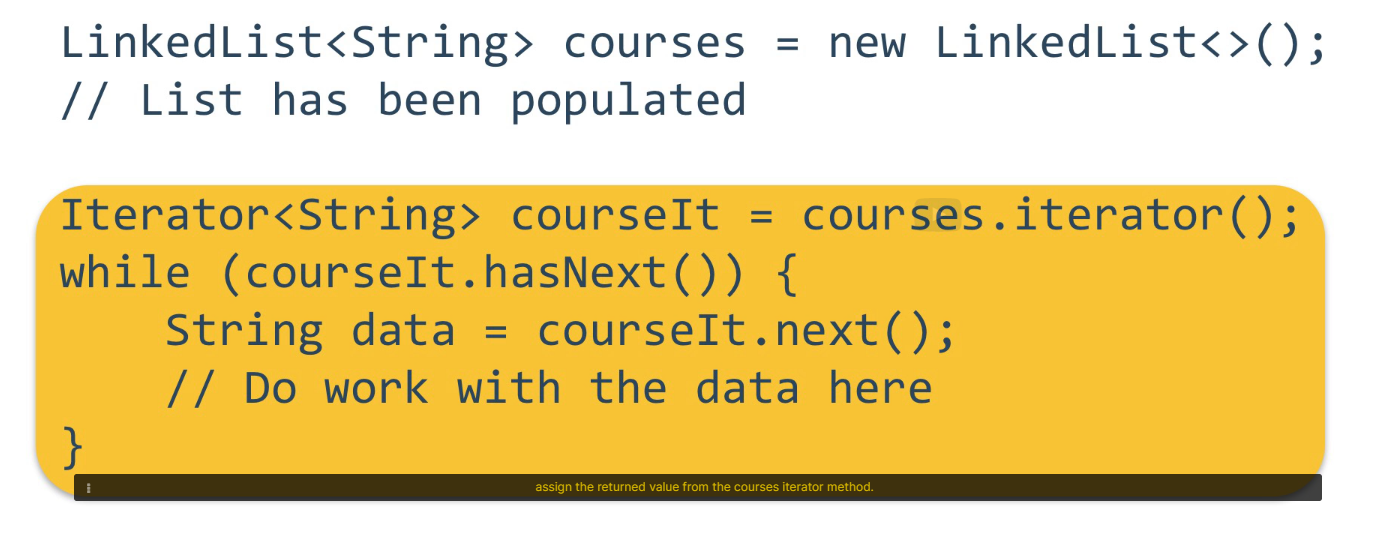

- Method 2: Implicitly using Iterator() method by using "for each" with ":"
    - This method does not require user to create an iterator object

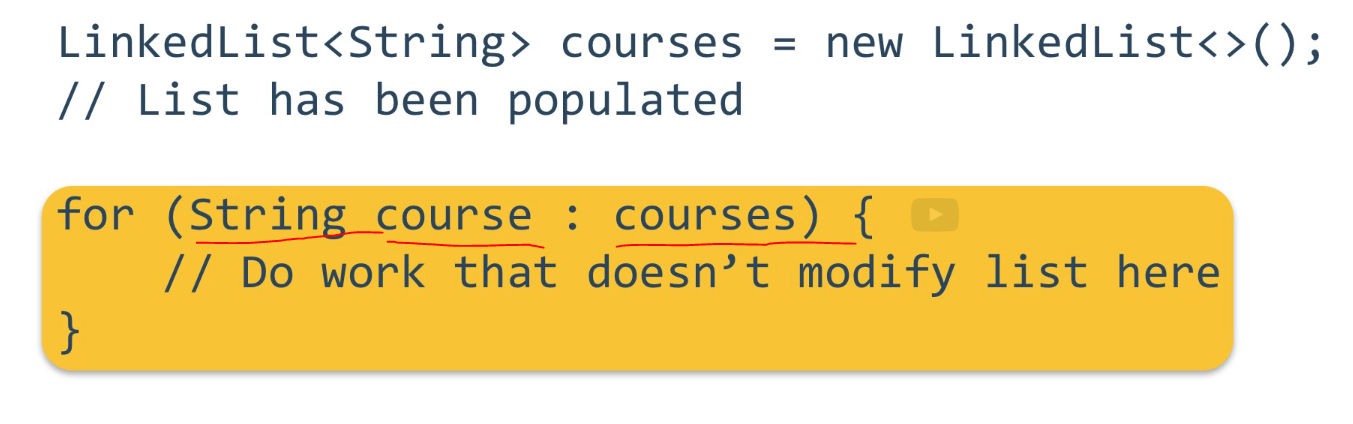

### 2.2. Recursion in SLL (SinglyLinkedList)

Assuming we have a sorted SLL (i.e. duplicated Node data are next to each other), how to use Recursion to remove duplicated Node data? (Assuming we have .compareTo() method implemented from Comparable interface already)

> Errata for code below: .compareTo() method should be used instead of .equals() method here (assuming we already implemented Comparable interface)

Example SLL:
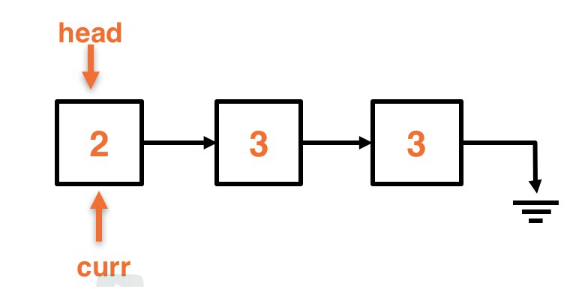

Solution:
- Here we used a **wrapped method** removeDuplicates() to invoke the actual method "rRemove" to remove dups.
    - It's common to write a **public wrapper method** that the user can call in order to encapsulate the functionality so that the user doesn't need to know the implementation details.
- Pt1 below is the base case
- Pt2 below is the recursive call
- Pt3 below is the if statement to remove duplicates, i.e. if current node is equal to current.next node (and current.next node is NOT Null), that means, current node and current.next node is **Duplicates**, so return current.next node to the previous stack layer, i.e. to skip current node in pointer connection.

- In the RHS of the picture, "stack" is built from bottom to up (direction is from SLL's head to tail), and "return" is from each stack, and it is from top to bottom (direction is from SLL's tail to head). 
    - [$3_{2}$] in RHS below means the 2nd "3" node in the original SLL. (In the end, the 2nd "3" node is kept and 1st "3" node is disconnected from SLL and garbage collected by Java, at step circled by "red" color)

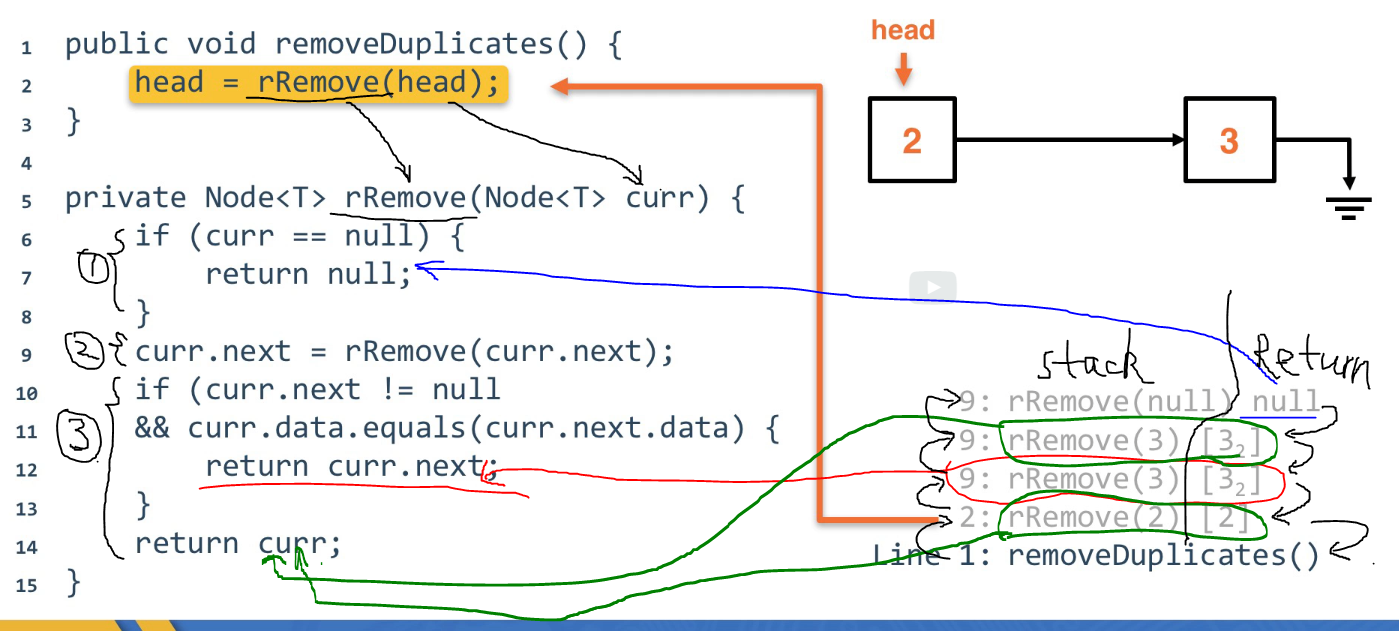

> Errata for above code: .compareTo() method should be used instead of .equals() method here (assuming we already implemented Comparable interface)

> Concept: **Pointer Reinforcement**
> - The Recursive algorithm we implemented above has an informal name called "pointer reinforcement"
> - This algorithm can be think of as using the return field to restructure and relink nodes
> - Think of each recursive step when it is invoked as progressively making smaller and smaller sublists of original SLL (i.e. stack built up from bottom to top in screenshot above), and think of the returns of each recursive step as progressively link/re-link the pointer and form SLL from smaller sublists to bigger list (i.e. return from top to bottom in screenshot above)

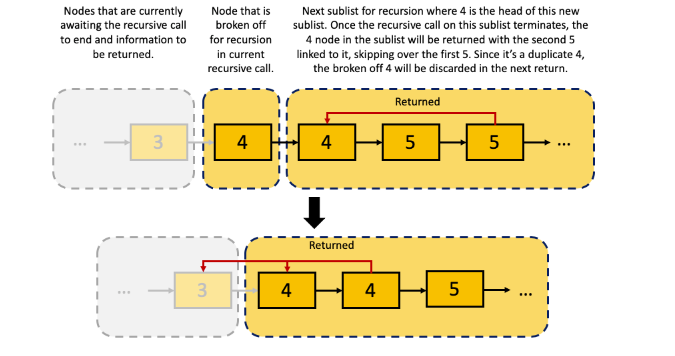

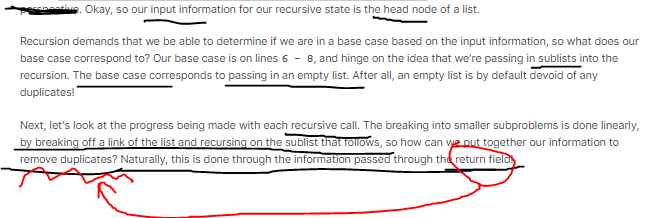

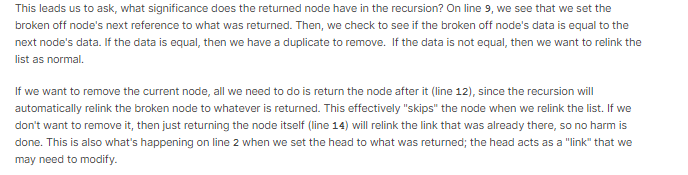

## 3. Doubly-Linked Lists (DLL)

### 3.1. Definition

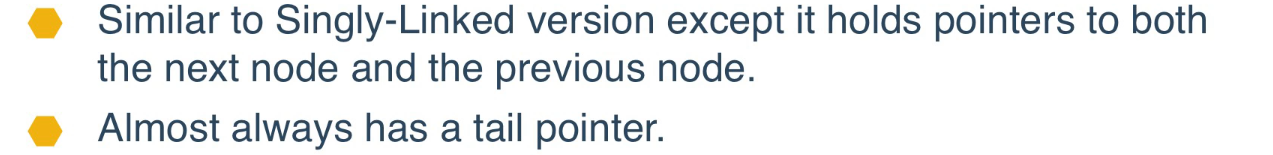

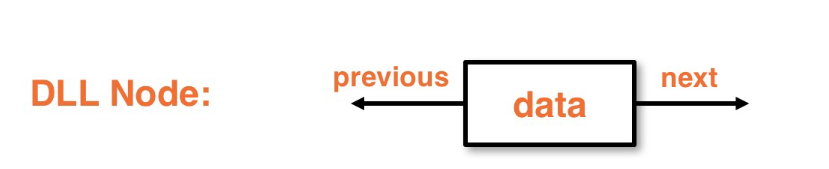

> Benefits: Time complexity can be reduced from O(n) in SLL to O(1) in DLL when adding node to back or removing node from back. Because DLL has tail pointer so users don't need to traverse entire list from head to tail to add/remove node to/from back.

### 3.2. Adding Node to the front of a DLL

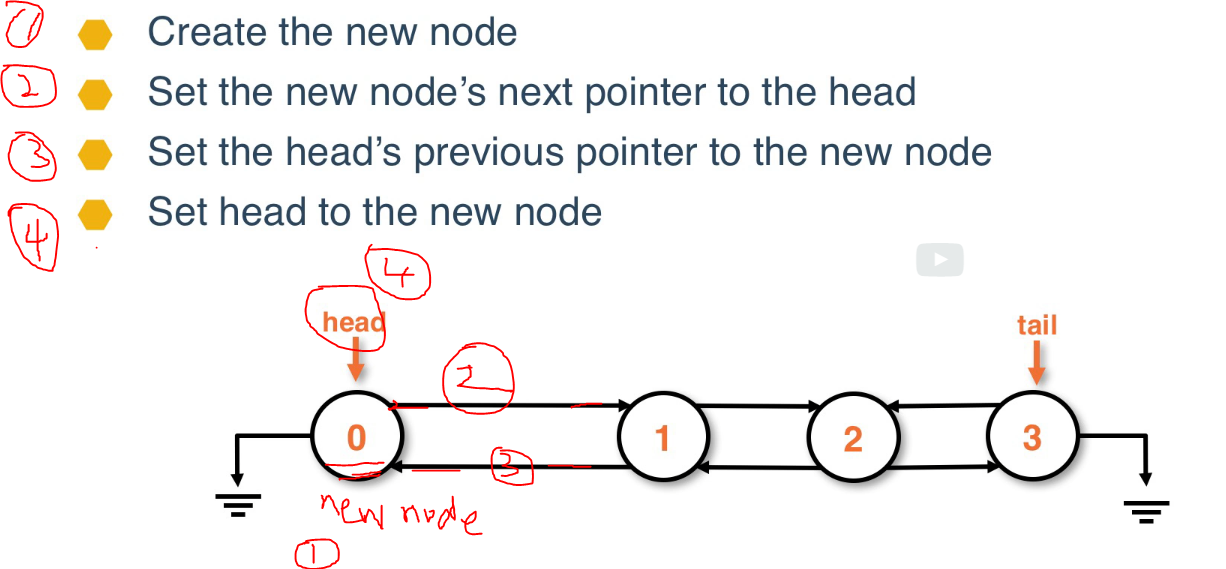

### 3.3. Adding Node to the back of a DLL

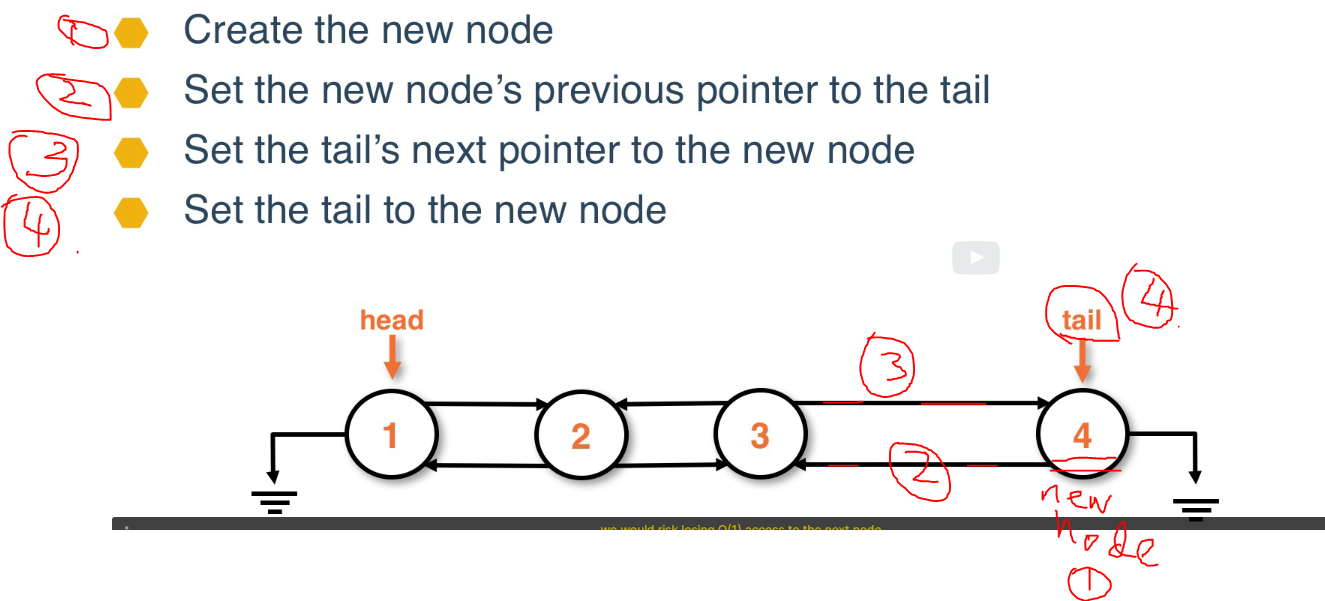

### 3.4. Removing Node from the Back of a DLL

Normal Cases:

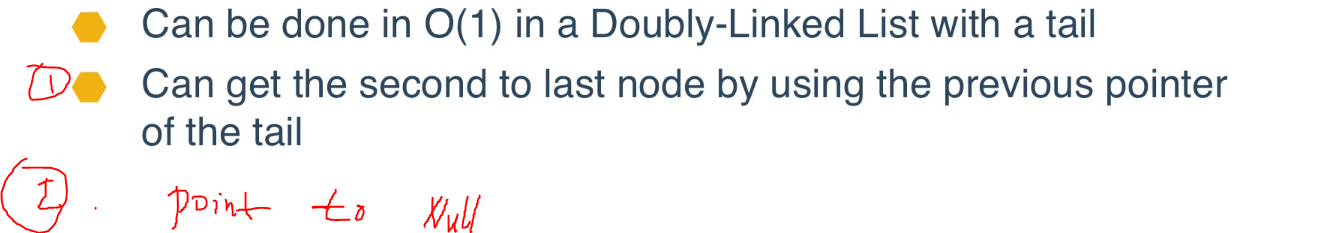

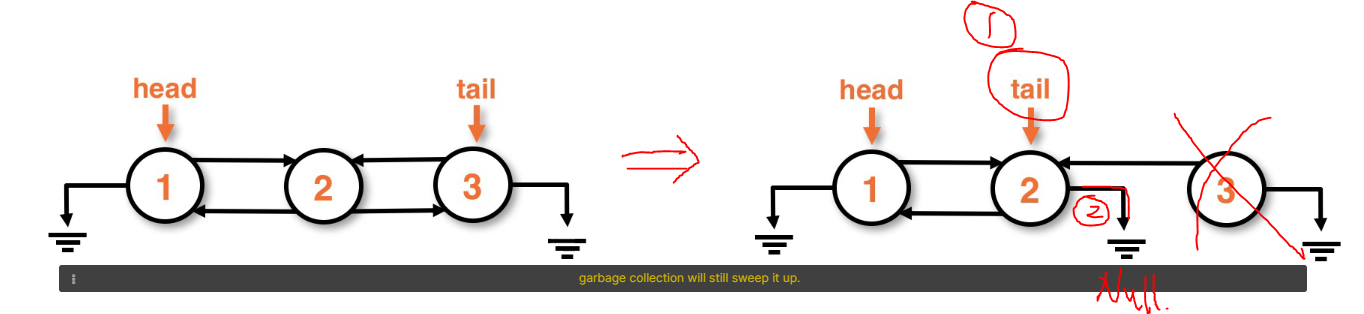

> Note: Node "3" above will be garbage collected even if it is pointing to Node "2". Because it cannot **be accessed from** other Node in memory anymore, even if it can access other node.

Edge Cases:


- For DLL with size of 1, need to point BOTH head and tail to Null, to make the original node garbage collected (not accessible anymore)
    - Compare to "RemoveFromBack() method in SLL" section Pt2, only head needs to point to Null

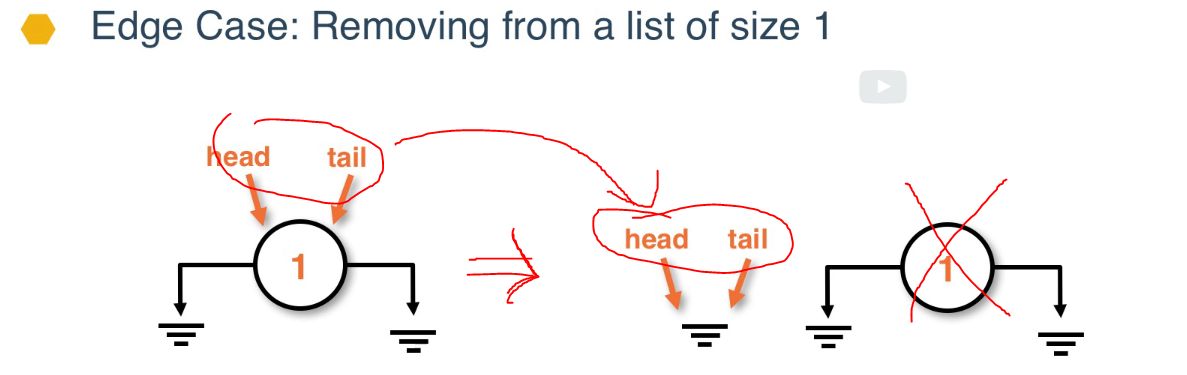

## 4. Circularly-Linked List (CLL)

### 4.1. Definition

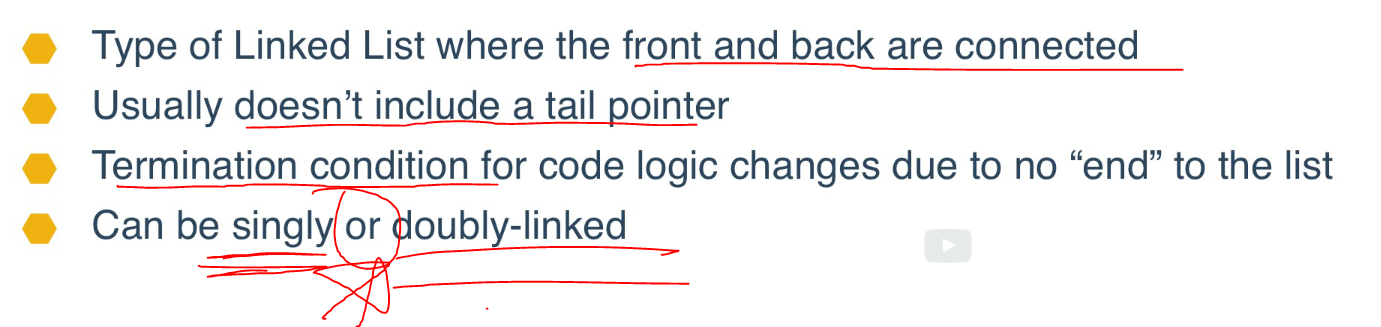

> Singly-linked CLL is more interesting to explore than Doubly-linked CLL

> Potential usage of CLL: e.g. music playlist looping from beginning after reaching the end

Example of Singly-Linked CLL:
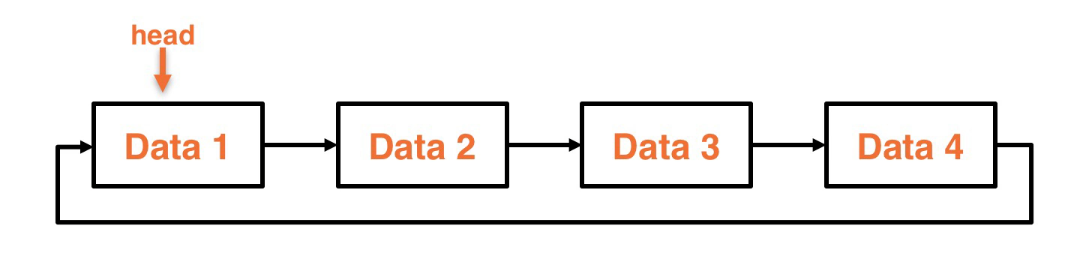

### 4.2. Adding Node to the Front of a Singly-Linked CLL

- If we follow what we did for SLL, we need to use O(n) time because we not only need to reset head to new node, but also needs to point last node's next pointer to new node due to Circular. The second step requires traversing to last node, which is O(n).

- Here is an efficient way to do that, this is O(1):
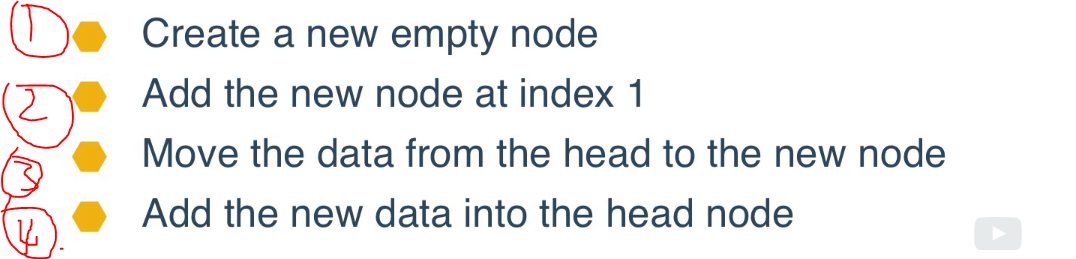

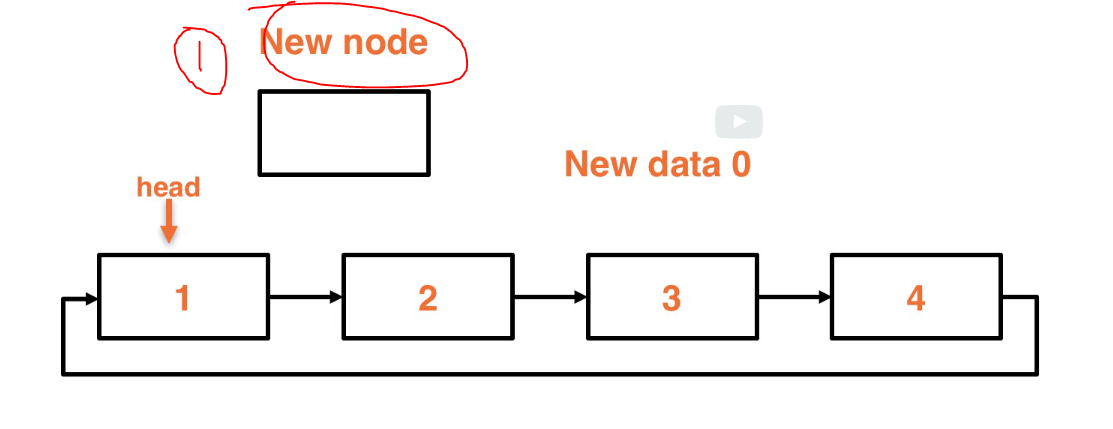

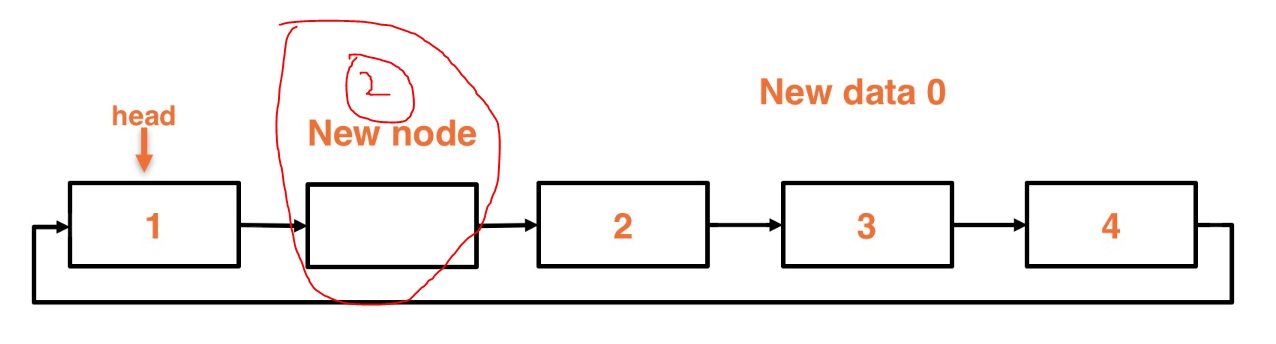

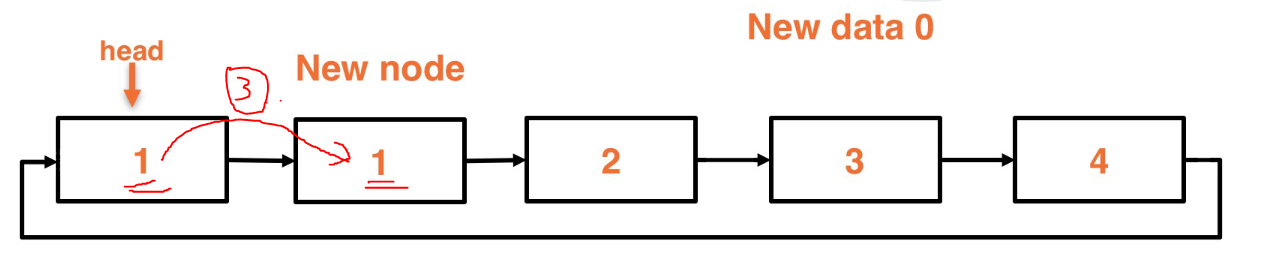

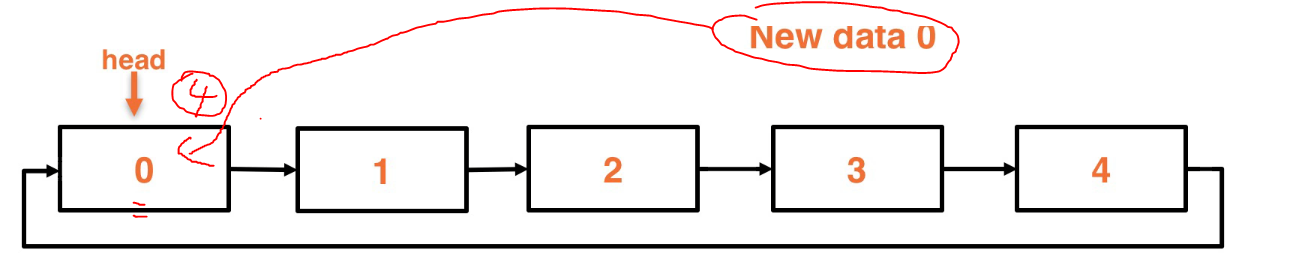

### 4.3. Adding Node to the Back of a Singly-Linked CLL

- Similar to above, there is an efficient way to do that O(1)
- The method is exactly the same as above method, plus one more step, i.e. Step 5: to move head pointer to next node.

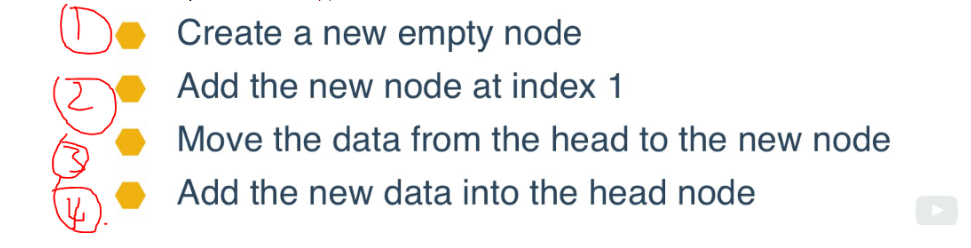
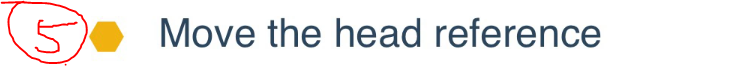

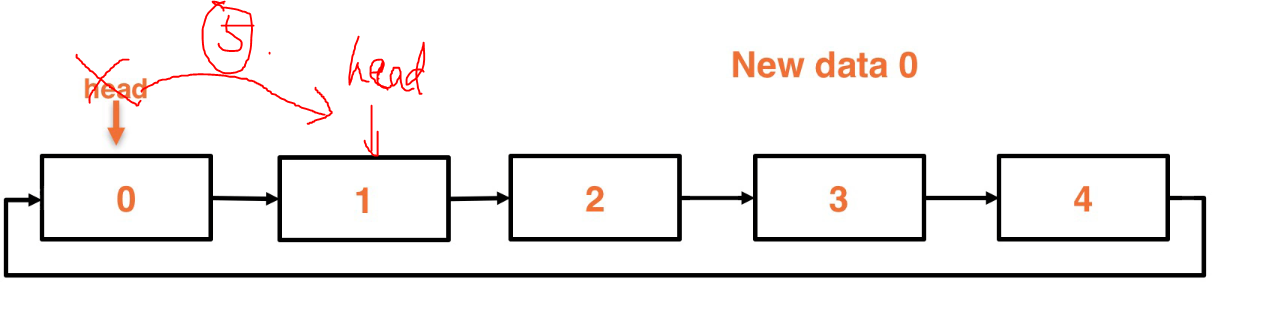

### 4.4. Removing Node from the Front of a Singly-Linked CLL

- If we follow what we did for SLL, we need to use O(n) time because we not only need to reset head to 2nd node, but also needs to point last node's next pointer to 2nd node due to Circular. The second step requires traversing to last node, which is O(n).

- Here is an efficient way to do that in O(1):

Normal case:
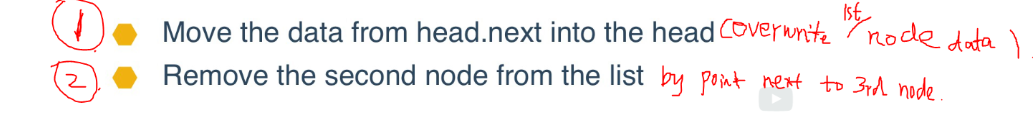

> Note: after Step 2, original 2nd Node will be garbage collected because it is not accessible from other nodes even if it can access other node.

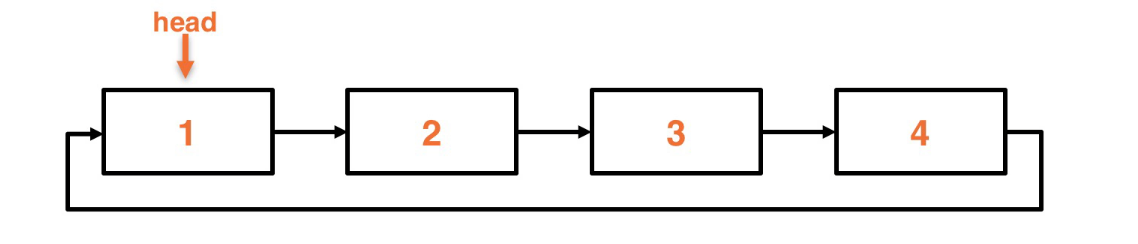

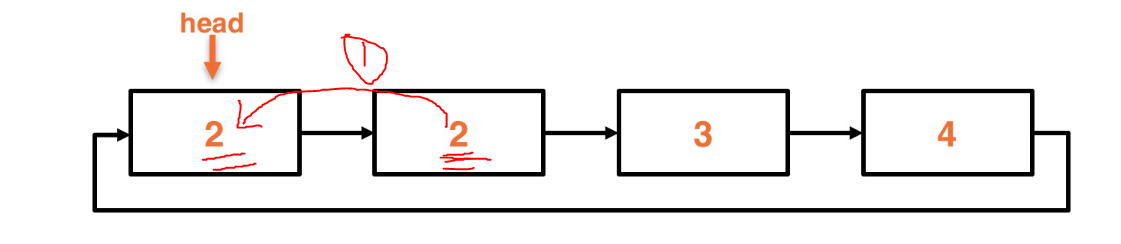

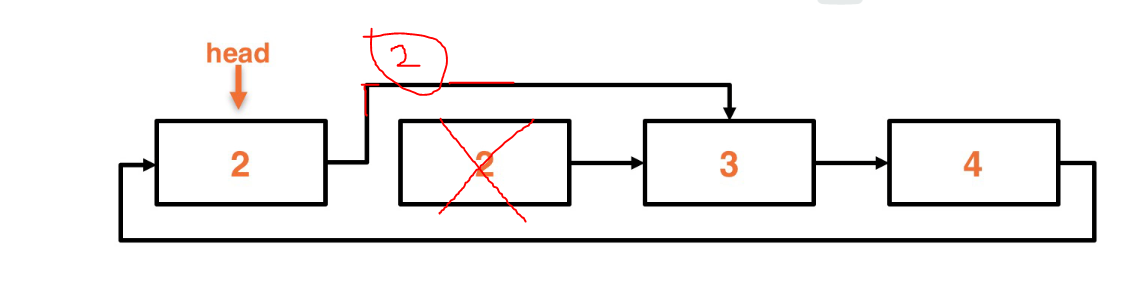

Edge Case:
- Singly-Linked CLL with Size 1: The head must be set to Null in order to remove garbage collect the original node.

### 4.5. Removing Node from the Back of a Singly-Linked CLL

- No special O(1) technique, i.e. O(n) is the best time complexity that can be reached
- Because we need to access the second last node no matter what, therefore we need to traverse the entire Linked List
- Then redirect the second last node's next pointer to head, to garbage collect the original last node.

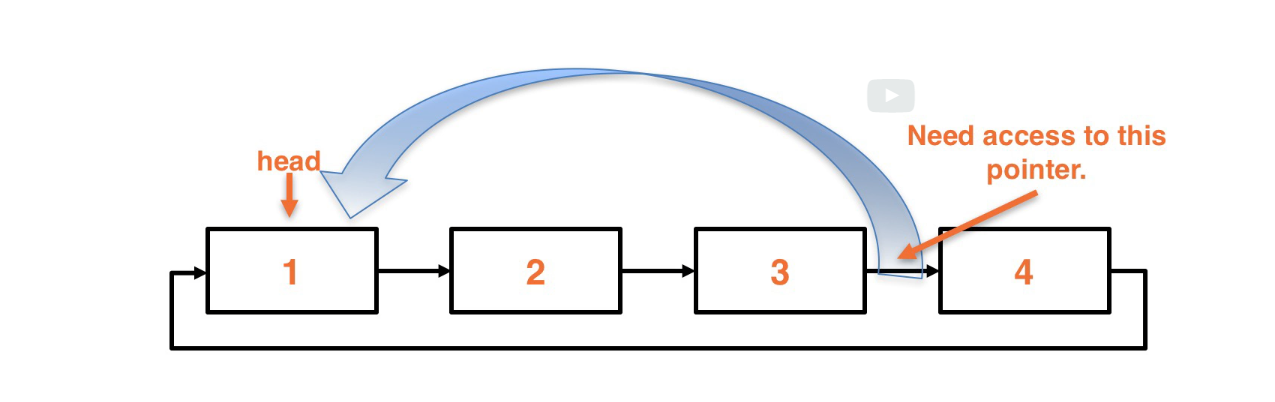

### 4.6. Removing Node from the Middle of a Singly-Linked CLL

- O(n) time complexity
- It's exactly like removing from the middle of a singly-linked list.
- Traverse the list until you reach the reference that is pointing to the node to be removed.
- Then you redirect the next reference to the node that comes after the node being removed.